# CO2 Emission by Vehicles

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years.
There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features. 


## The Data 

### Model

- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- FFV = Flexible-fuel vehicle
- SWB = Short wheelbase
- LWB = Long wheelbase
- EWB = Extended wheelbase

### Transmission

- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

### Fuel type

- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

### Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg) CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving


## Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

In [103]:
emissions = pd.read_csv('CO2 Emissions_Canada.csv')

In [104]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [105]:
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [106]:
emissions.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


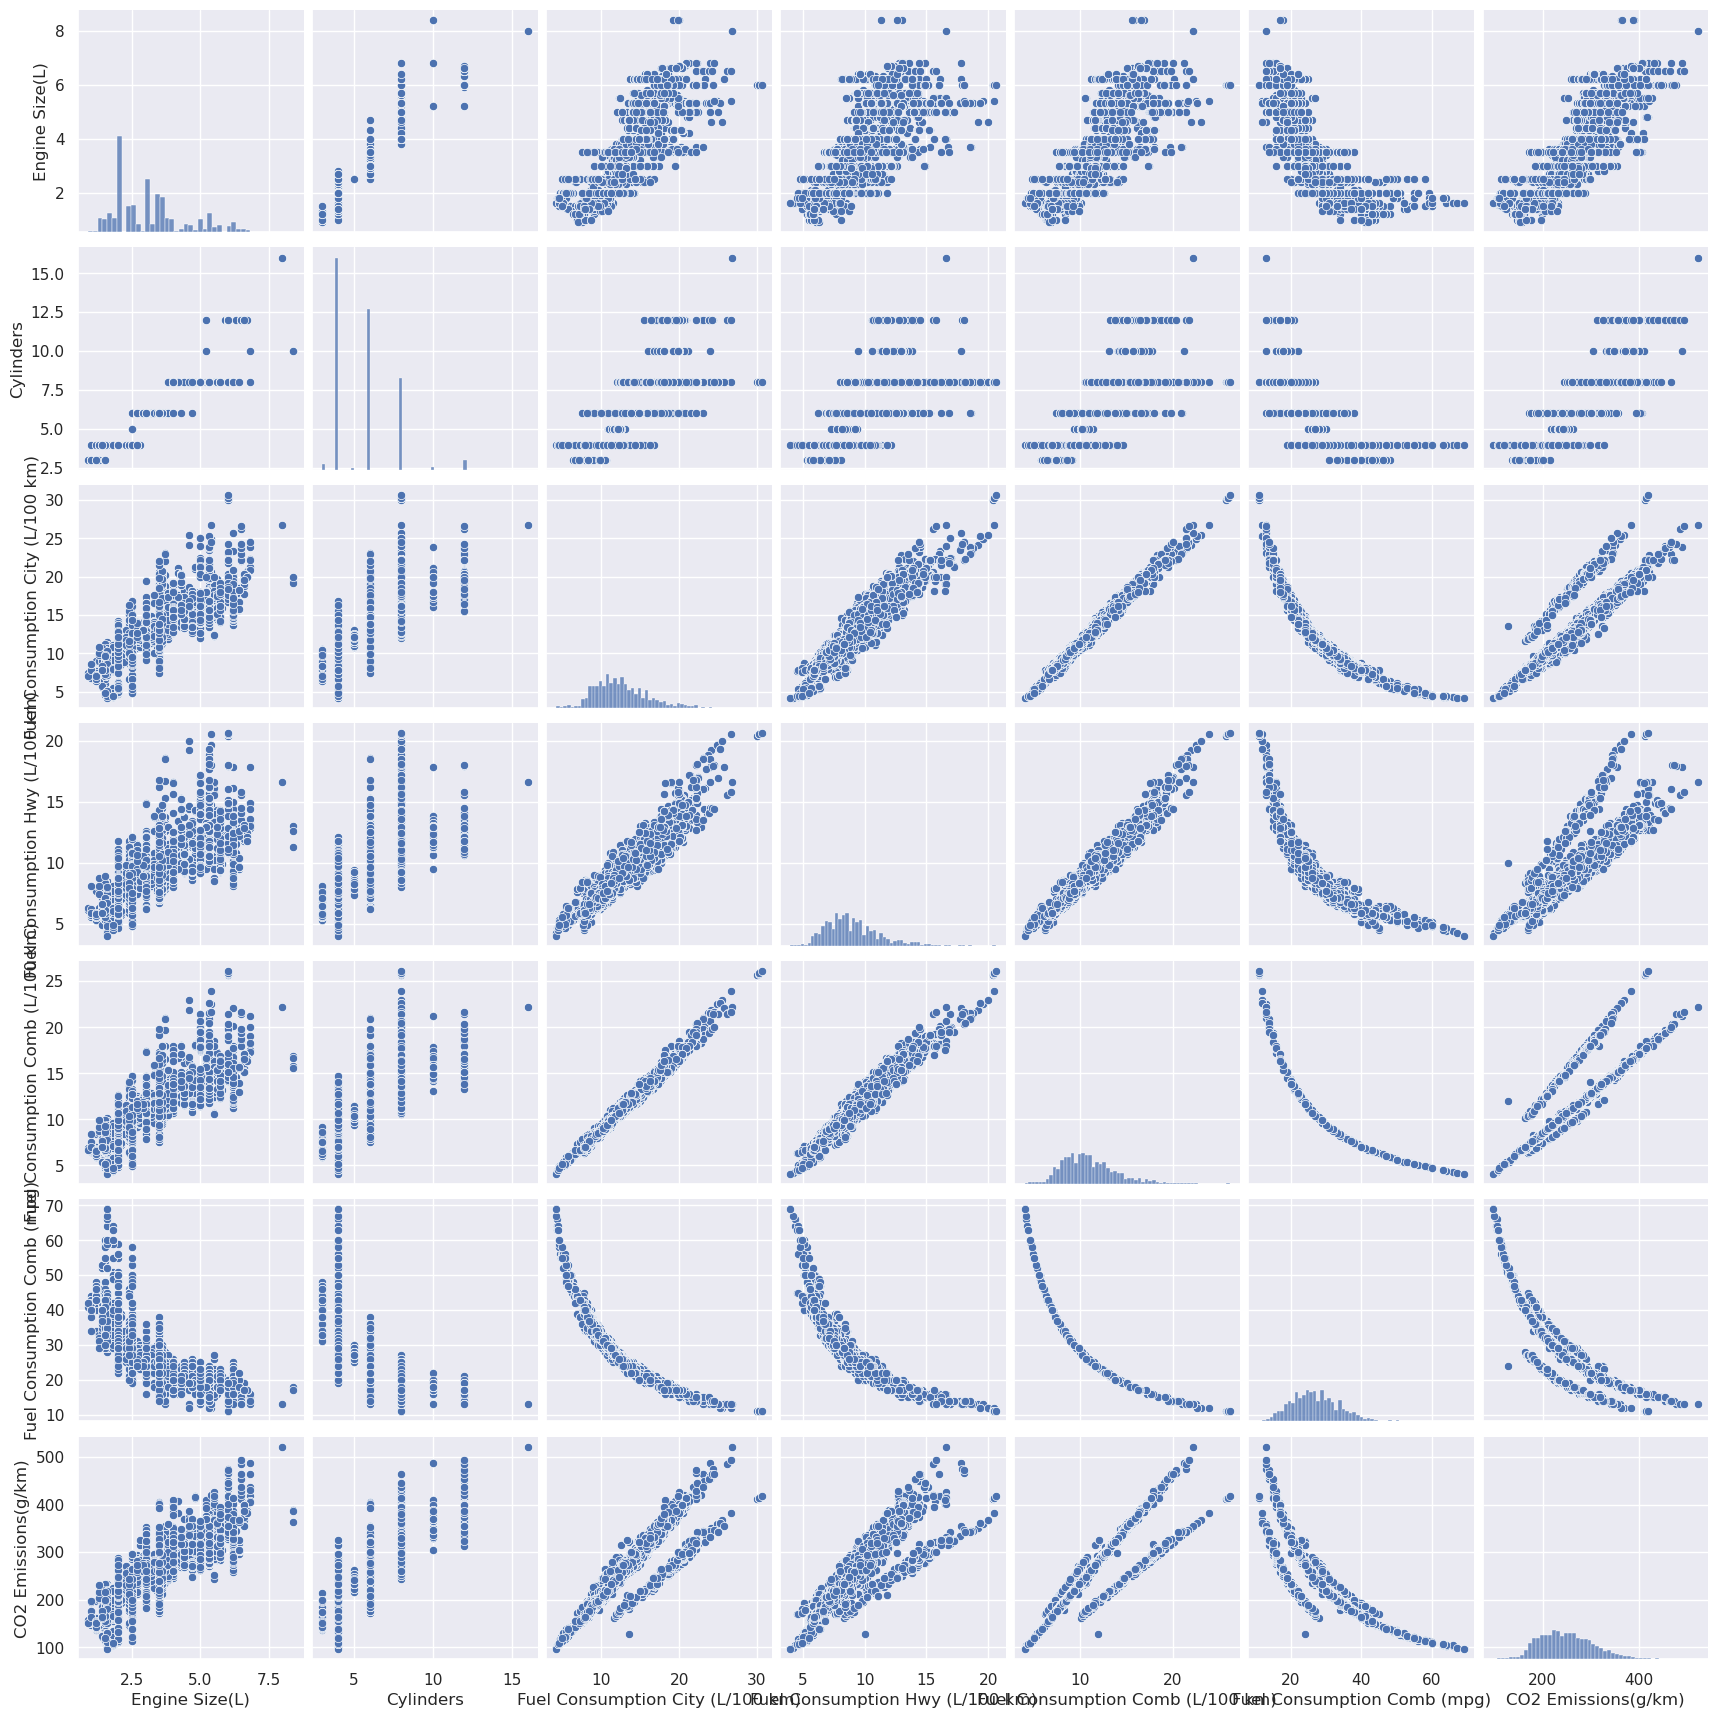

In [107]:
sns.pairplot(emissions)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

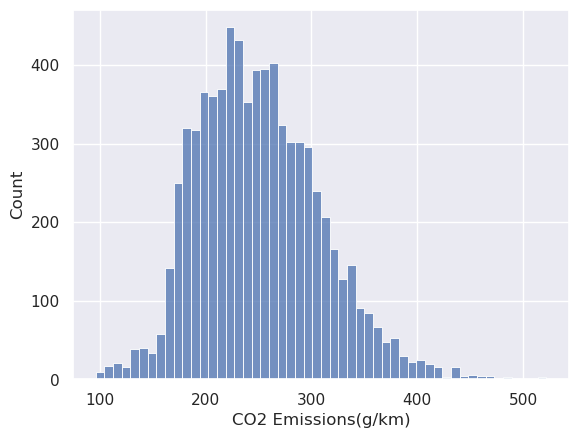

In [108]:
sns.histplot(emissions['CO2 Emissions(g/km)'])
#não está equilibrado. Não está próximo de uma distribuição normal

<Axes: >

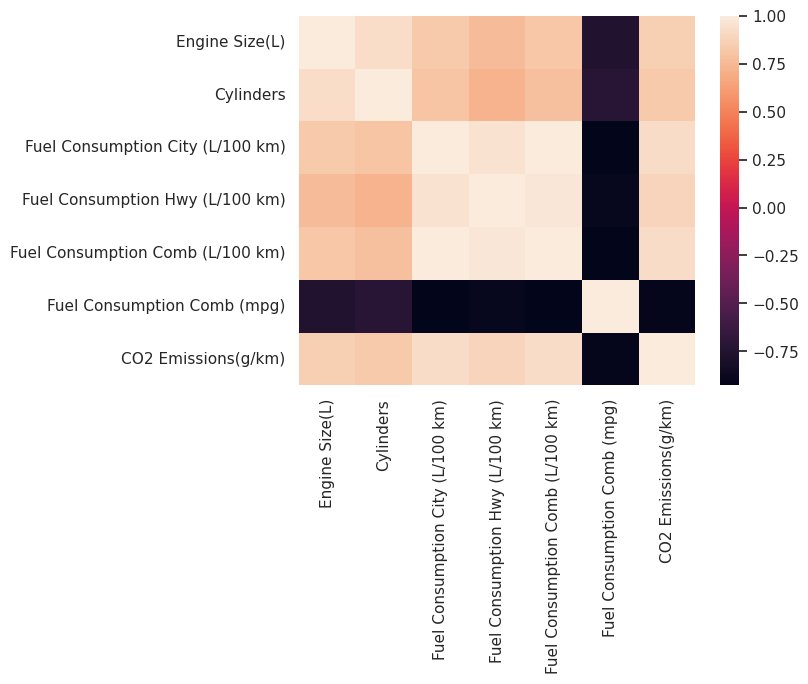

In [109]:
sns.heatmap(emissions.corr(numeric_only=True))

#fuel consumption comb mpg inversamente proporcional a co2 emissions

In [110]:
emissions.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

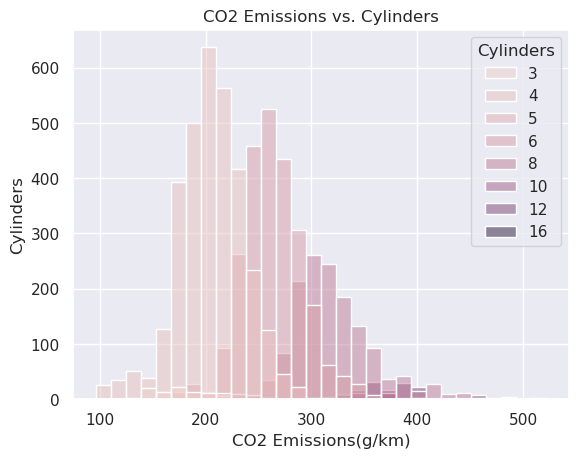

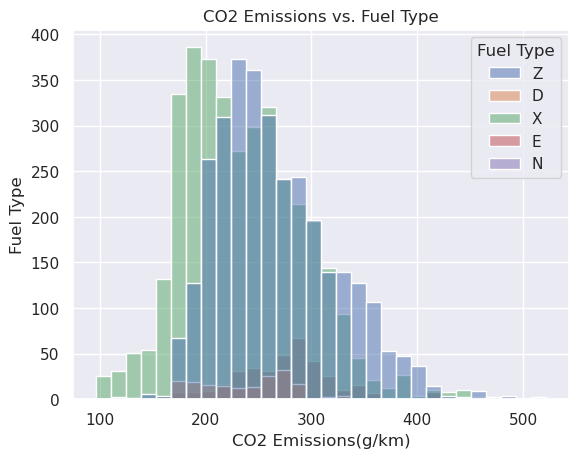

In [111]:
for feature in emissions.columns:
    unique_values = emissions[feature].nunique()
    max_unique_values = 10 

    if feature != 'CO2 Emissions(g/km)' and unique_values <= max_unique_values:
        sns.histplot(data=emissions, x='CO2 Emissions(g/km)', bins=30, hue=feature)
        plt.title(f'CO2 Emissions vs. {feature}')
        plt.xlabel('CO2 Emissions(g/km)')
        plt.ylabel(f'{feature}')
        plt.show()

In [112]:
emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

/home/ritavaz02/miniconda3/envs/daa/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


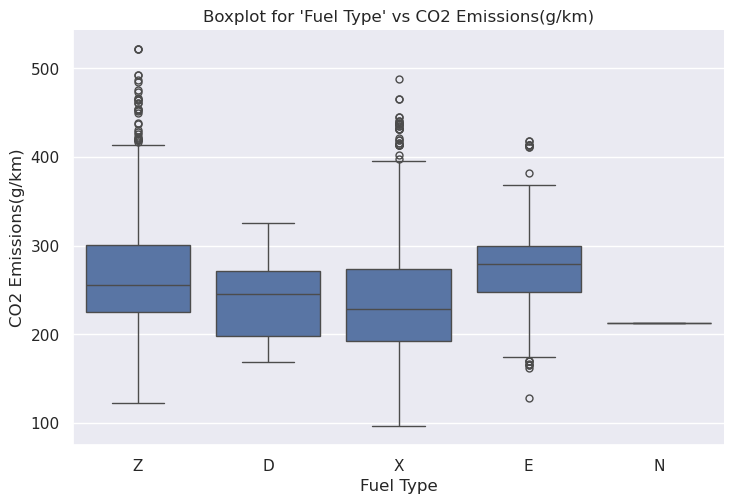

In [113]:
sns.catplot(x='Fuel Type', y="CO2 Emissions(g/km)", data=emissions, kind="box", aspect=1.5)
plt.title("Boxplot for 'Fuel Type' vs CO2 Emissions(g/km)")
plt.show()

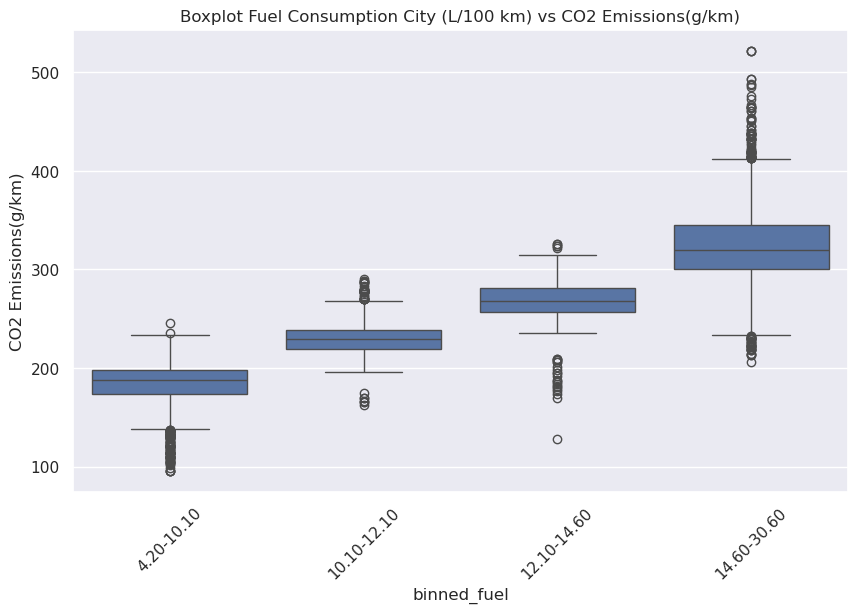

In [168]:
# Criando bins percentuais
bins = pd.qcut(emissions['Fuel Consumption City (L/100 km)'], q=4, retbins=True)
emissions['binned_fuel'] = bins[0]

# Criando rótulos para o eixo x com os intervalos reais dos bins
bin_edges = bins[1]
bin_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Construindo o boxplot
plt.figure(figsize=(10, 6))  
sns.boxplot(x='binned_fuel', y='CO2 Emissions(g/km)', data=emissions)
plt.xticks(ticks=range(4), labels=bin_labels, rotation=45)
plt.title('Boxplot Fuel Consumption City (L/100 km) vs CO2 Emissions(g/km)')
plt.show()

<Axes: >

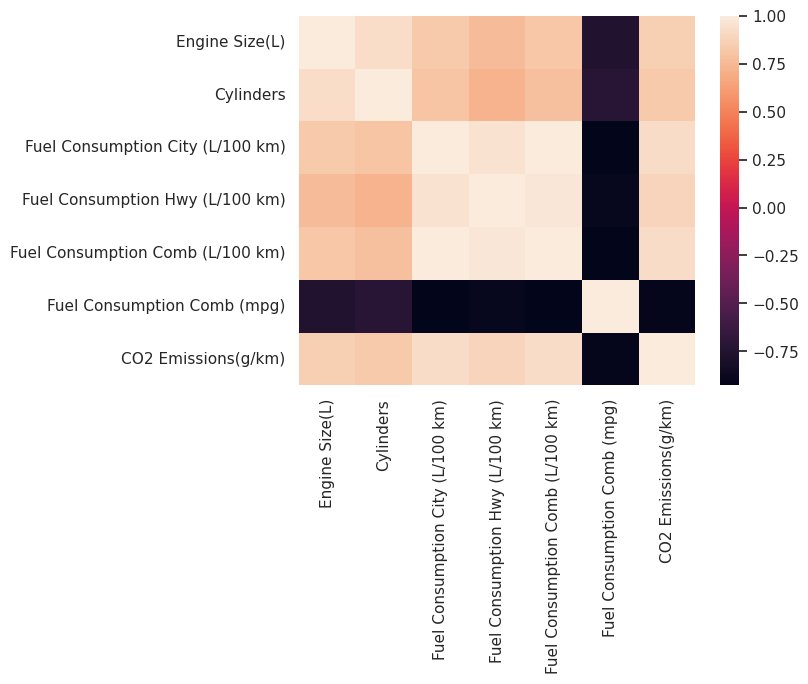

In [114]:
sns.heatmap(emissions.corr(numeric_only=True))

#fuel consumption comb mpg inversamente proporcional a co2 emissions

In [115]:
emissions.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

## Handling missing data and possible data transformations

### 1. Missing Values
- Remove missing values, outliers, and unnecessary rows/ columns
- Check and impute null values
- Check Imbalanced data
- Re-indexing and reformatting our data

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

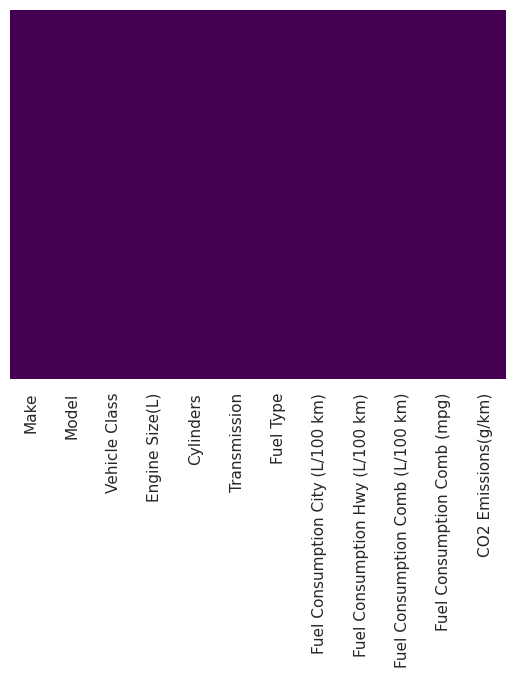

In [116]:
sns.heatmap(emissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')
emissions.isnull().sum()

In [117]:
emissions.drop('Fuel Consumption Comb (L/100 km)', axis=1, inplace=True)
emissions.drop('Fuel Consumption Hwy (L/100 km)', axis=1, inplace=True)

Assim, podemos concluir que não existem missing values neste dataset

## Handling Categorical Features

In [118]:
emissions.drop('Vehicle Class', axis=1, inplace=True)
emissions.drop('Make', axis=1, inplace=True)

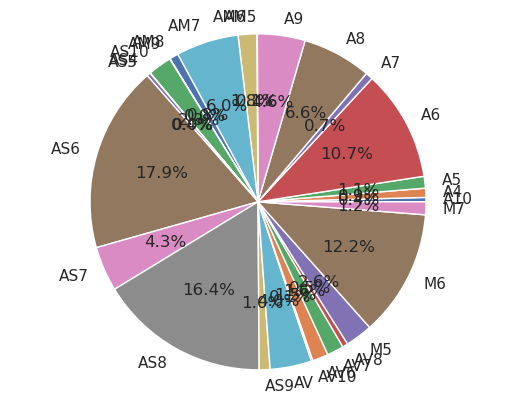

In [119]:
# transmission type is letters + one number, so take out the number
transmission_count = emissions['Transmission']
labels = transmission_count.astype('category').cat.categories.tolist()
counts = transmission_count.value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

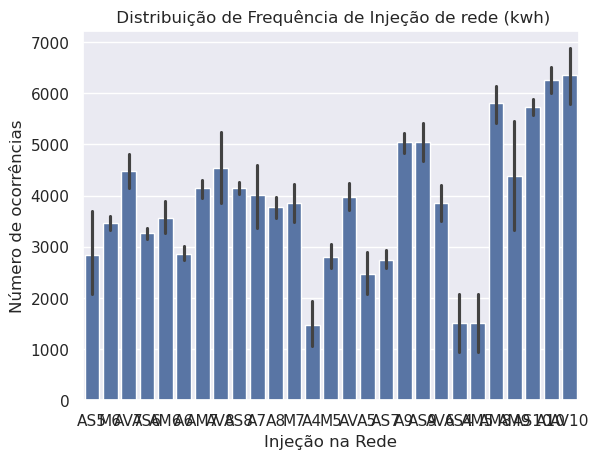

In [120]:
transmission_count = emissions['Transmission']
sns.set(style="darkgrid")
sns.barplot(x=transmission_count.values, y=transmission_count.index)
plt.title(' Distribuição de Frequência de Injeção de rede (kwh)')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Injeção na Rede', fontsize=12)
plt.show()

### a) Binary Encoding

In [121]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


#### Encode Transmission

In [122]:
import category_encoders as ce

encoder_transmission = ce.BinaryEncoder(cols=['Transmission'])
df_binary = encoder_transmission.fit_transform(emissions)

df_binary.head()

,Model,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Transmission_3,Transmission_4,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ILX,2.0,4,0,0,0,0,1,Z,9.9,33,196
1,ILX,2.4,4,0,0,0,1,0,Z,11.2,29,221
2,ILX HYBRID,1.5,4,0,0,0,1,1,Z,6.0,48,136
3,MDX 4WD,3.5,6,0,0,1,0,0,Z,12.7,25,255
4,RDX AWD,3.5,6,0,0,1,0,0,Z,12.1,27,244


#### Encode Fuel Type

In [123]:
encoder_fuel = ce.BinaryEncoder(cols=['Fuel Type'])
df_binary = encoder_fuel.fit_transform(df_binary)

df_binary.head()

,Model,Engine Size(L),Cylinders,Transmission_0,Transmission_1,Transmission_2,Transmission_3,Transmission_4,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ILX,2.0,4,0,0,0,0,1,0,0,1,9.9,33,196
1,ILX,2.4,4,0,0,0,1,0,0,0,1,11.2,29,221
2,ILX HYBRID,1.5,4,0,0,0,1,1,0,0,1,6.0,48,136
3,MDX 4WD,3.5,6,0,0,1,0,0,0,0,1,12.7,25,255
4,RDX AWD,3.5,6,0,0,1,0,0,0,0,1,12.1,27,244


#### Encode Model

In [124]:
encoder_model = ce.BinaryEncoder(cols=['Model'])
df_binary = encoder_model.fit_transform(df_binary)
emissions = df_binary
emissions.head()


,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Transmission_1,Transmission_2,Transmission_3,Transmission_4,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,9.9,33,196
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,11.2,29,221
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,6.0,48,136
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,12.7,25,255
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,12.1,27,244


<Axes: >

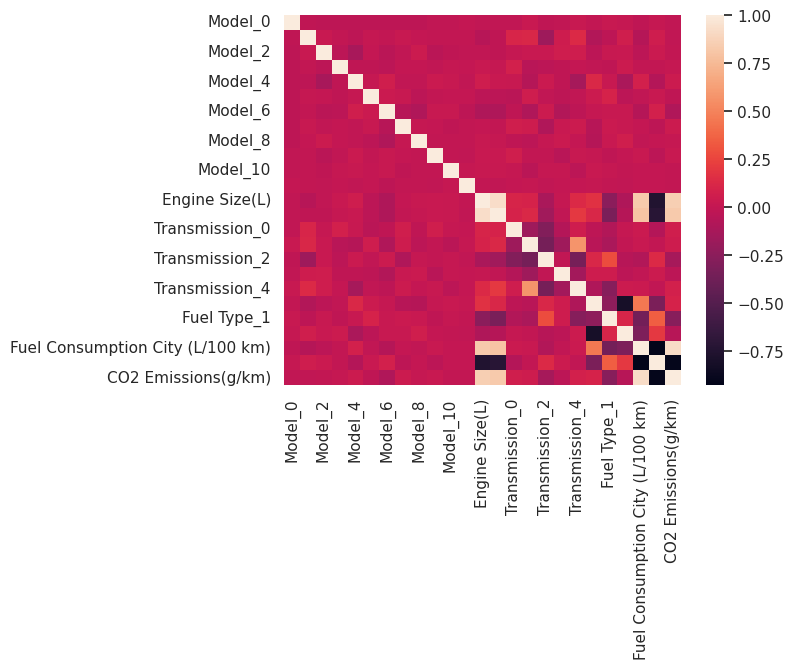

In [125]:
sns.heatmap(emissions.corr())

In [126]:
emissions.drop('Cylinders', axis=1, inplace=True)
emissions.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,...,Transmission_1,Transmission_2,Transmission_3,Transmission_4,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,9.9,33,196
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,11.2,29,221
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,6.0,48,136
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,12.7,25,255
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,12.1,27,244


<Axes: >

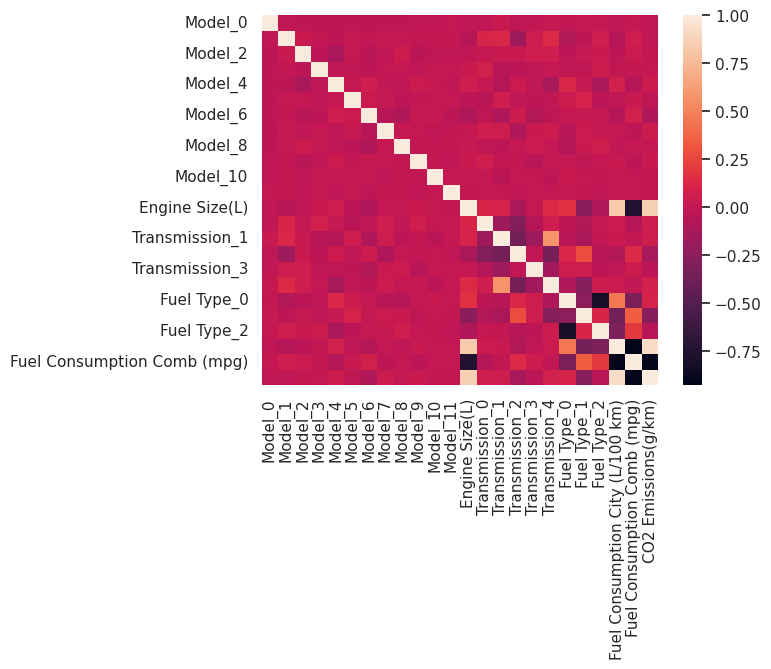

In [127]:
sns.heatmap(emissions.corr())

# Model Training and Testing

In [128]:
emissions.columns

Index(['Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5',
       'Model_6', 'Model_7', 'Model_8', 'Model_9', 'Model_10', 'Model_11',
       'Engine Size(L)', 'Transmission_0', 'Transmission_1', 'Transmission_2',
       'Transmission_3', 'Transmission_4', 'Fuel Type_0', 'Fuel Type_1',
       'Fuel Type_2', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### X and y arrays

In [129]:
emissions.columns

Index(['Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5',
       'Model_6', 'Model_7', 'Model_8', 'Model_9', 'Model_10', 'Model_11',
       'Engine Size(L)', 'Transmission_0', 'Transmission_1', 'Transmission_2',
       'Transmission_3', 'Transmission_4', 'Fuel Type_0', 'Fuel Type_1',
       'Fuel Type_2', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [130]:
X = emissions[['Model_0', 'Model_1', 'Model_2', 'Engine Size(L)', 'Transmission_0',
       'Transmission_1', 'Transmission_2', 'Fuel Type_0', 'Fuel Type_1',
       'Fuel Type_2', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Comb (mpg)']]
y = emissions['CO2 Emissions(g/km)']

## Train Test Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2023)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

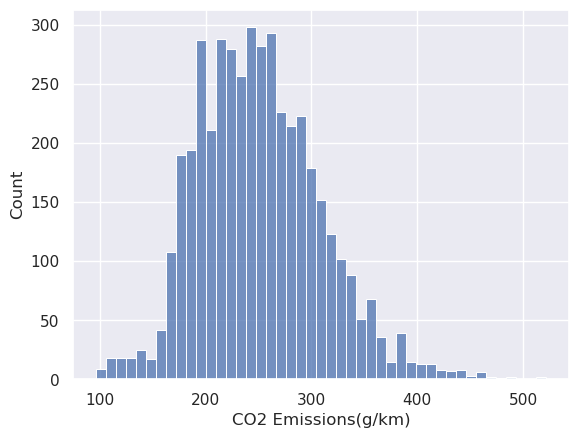

In [133]:
sns.histplot(y_train)

A partição não afetou significativamente a distribuição dos dados, enviasada para a esquerda

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

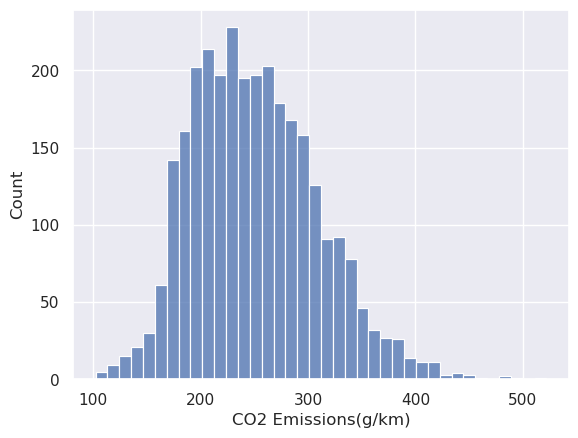

In [134]:
sns.histplot(y_test)

## Creating and Training the Model

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [137]:
print(lm.intercept_)

103.51240592555484


In [138]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Model_0,9.698878
Model_1,4.300950
Model_2,2.140317
Engine Size(L),0.617272
Transmission_0,2.677167
Transmission_1,0.940834
Transmission_2,2.619503
Fuel Type_0,-130.751137
Fuel Type_1,2.131505
Fuel Type_2,-28.867219


### Predictions from our Model

In [139]:
predictions = lm.predict(X_test)

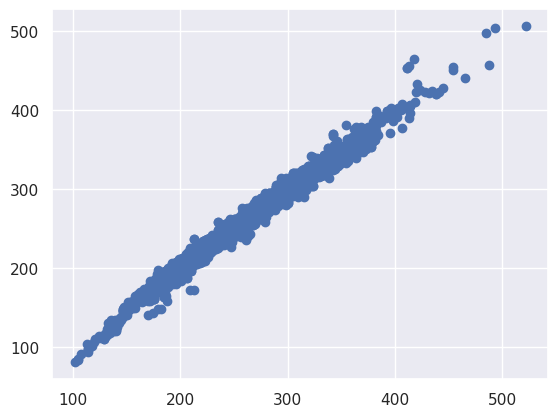

In [140]:
plt.scatter(y_test,predictions)

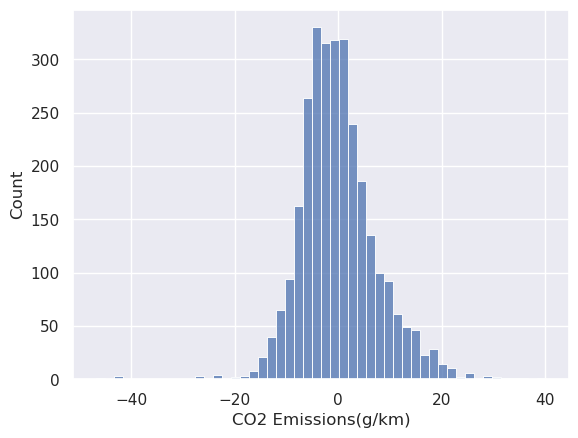

In [141]:
sns.histplot((y_test-predictions), bins=50);

### Regression Evaluation Metrics

In [142]:
from sklearn import metrics

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.593996972445079
MSE: 56.046327546416435
RMSE: 7.4864095230234655


In [144]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print('R2:', r_squared)

R2: 0.9836774713327832


## Random Forest

In [145]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [146]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [147]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

In [148]:
# y_pred = model.predict(X_test)

In [149]:
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, y_pred)
# print(f"MSE: {mse}")
# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R^2: {r_squared}")

# GridSearch

In [150]:
from sklearn.model_selection import GridSearchCV


In [151]:
# param_grid = {
#     'n_estimators': [50,100,150,300],
#     'max_features': [3,5,10],
#     'max_depth': [5,10,15],
#     'criterion': ['poisson', 'squared_error', 'friedman_mse'],
#     'ccp_alpha': [0.0,0.01,0.02]
# }

In [152]:
# grid_search = GridSearchCV(RandomForestRegressor(random_state=2023), param_grid=param_grid, cv=10, verbose=3, n_jobs=-1)

In [153]:
# grid_search.fit(X_train, y_train)

In [154]:
# grid_search.best_params_

In [155]:
# best_model = grid_search.best_estimator_
# best_model

In [156]:
# y_prediction = grid_search.predict(X_test)
# mse = mean_squared_error(y_test, y_prediction)
# mae = mean_absolute_error(y_test, y_prediction)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, y_prediction)
# print(f"MSE: {mse}")
# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R^2: {r_squared}")

# SVR

In [157]:
# from sklearn.svm import SVR

In [158]:
# param_grid = { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'sigmoid']}

In [159]:
# grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

In [160]:
# grid_svr.fit(X_train, y_train)

In [161]:
# grid_svr.best_params_

In [162]:
# grid_svr.best_estimator_

In [163]:
# grid_svr_predictions = grid_svr.predict(X_test)
# mse = mean_squared_error(y_test, grid_svr_predictions)
# mae = mean_absolute_error(y_test, grid_svr_predictions)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, grid_svr_predictions)
# print(f"MSE: {mse}")
# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R^2: {r_squared}")